<a href="https://colab.research.google.com/github/Colinkl/SwEng/blob/master/PIS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек и данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import sklearn.preprocessing as prepr
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)

In [ ]:
names = ["Id","RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
cols = data.columns


In [ ]:
data['Class'].replace(
                      {
                       1:"building_float", 
                       2:"building_non_float", 
                       3:"vehicle_float",
                       4:"vehicle_non_float", 
                       5:"containers", 
                       6:"tableware",
                       7:"headlamps"
                      }, inplace=True)
data.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_float


1) Сделать виджет для выбора переменной. Для выбранной переменной строиться гистограмма, если переменная числовая или столбчатая диаграмма, если переменная категориальная.

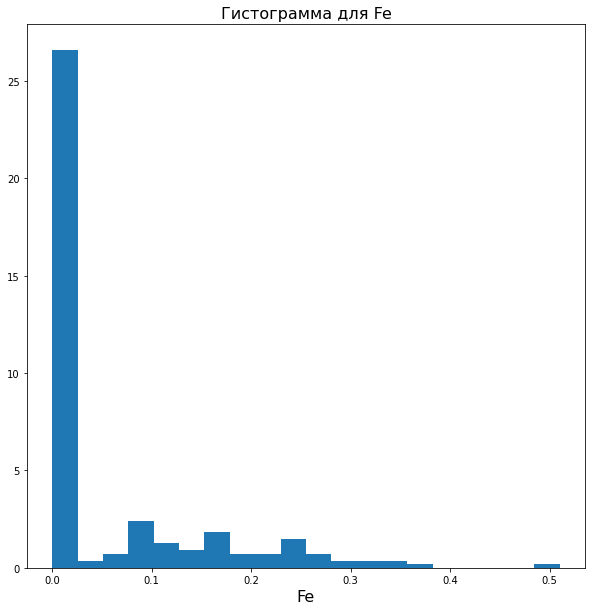

In [ ]:
col = "Fe" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]

fig, ax = plt.subplots(figsize=(10,10))

if col == "Class":
  ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)
  ax.set_title("Barplot для " + col, fontsize=16)
  ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)
else:
  ax.hist(data[col], density = True, bins = 20)
  ax.set_xlabel(col, fontsize=16)
  ax.set_title("Гистограмма для " + col, fontsize=16)
  
plt.show()
     

2) Cделать виджет для выбора переменной. Для выбранной переменной строится диаграмма "ящик с усами".2) Cделать виджет для выбора переменной. Для выбранной переменной строится диаграмма "ящик с усами".

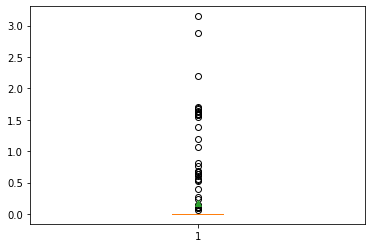

In [ ]:
col = "Ba" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]

fig, ax = plt.subplots()

ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)

plt.show()

3) Cделать виджет для выбора пары переменных, для них строится парный график с раскраской точек по классам.

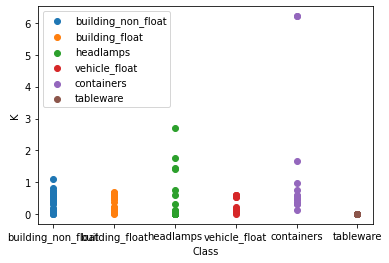

In [ ]:
col1 = "Class" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
col2 = "K" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][ data['Class']==glassType ],
             data[col2][ data['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()